<a href="https://colab.research.google.com/github/kroosYE/project/blob/main/%E6%AF%94%E7%89%B9%E5%B9%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#作法
https://www.coingecko.com/zh-tw
利用爬蟲到比特幣網站擷取價量資訊，然後用Pandas轉成DataFrame並計算移動平均價，用Matplotilb繪製價格與均線趨勢圖

In [1]:
import requests
import pandas as pd

In [2]:
url = 'https://www.coingecko.com/price_charts/1/usd/365_days.json'
r = requests.get(url) #HTTP get
type(r)

requests.models.Response

In [3]:
r_json = r.json() #將json格式資料轉成Python字典
type(r_json)

dict

In [4]:
prices = r_json['stats'] #由stats取得價格時間序列資料
type(prices)

list

In [5]:
df = pd.DataFrame(prices) #將串列用pandas轉成資料框
df

,0,1
0,1641168000000,47387.212168
1,1641254400000,46531.140861
2,1641340800000,45938.024272
3,1641427200000,43647.147508
4,1641513600000,43216.458677
...,...,...
361,1672358400000,16644.379087
362,1672444800000,16604.020520
363,1672531200000,16540.693625
364,1672617600000,16615.969318


In [6]:
df.columns = ['datetime', 'USD'] #設定欄索引
df['datetime'] = pd.to_datetime(df['datetime'], unit='s') #轉成datatime型態
df.index = df['datetime'] #設定列索引
df

OutOfBoundsDatetime: ignored

In [7]:
df['MA_7'] = df['USD'].rolling(window = 7).mean() #計算一周移動平均線
df['MA_30'] = df['USD'].rolling(window = 30).mean()
df

,datetime,USD,MA_7,MA_30
0,1641168000000,47387.212168,NaN,NaN
1,1641254400000,46531.140861,NaN,NaN
2,1641340800000,45938.024272,NaN,NaN
3,1641427200000,43647.147508,NaN,NaN
4,1641513600000,43216.458677,NaN,NaN
...,...,...,...,...
361,1672358400000,16644.379087,16752.486922,16978.460832
362,1672444800000,16604.020520,16725.710505,16959.044764
363,1672531200000,16540.693625,16681.728350,16944.643416
364,1672617600000,16615.969318,16649.412961,16929.013282


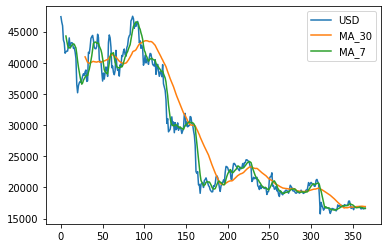

In [8]:
import matplotlib.pyplot as plt
df[['USD', 'MA_30', 'MA_7']].plot(kind = 'line')

In [11]:
last_time = str(df.iloc[-1:].index.values[0])[0:19]

In [12]:
last_price = int(df.iloc[-1:]['USD'].values[0])

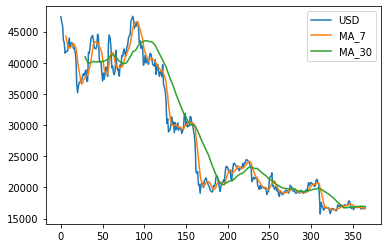

In [9]:
df[['USD', 'MA_7', 'MA_30']].plot(kind = 'line')

<function matplotlib.pyplot.show(*args, **kw)>

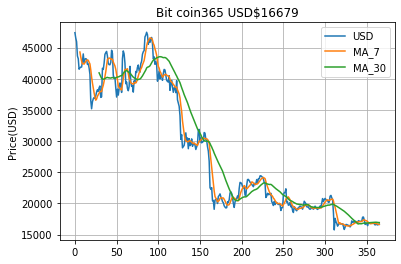

In [13]:
df[['USD', 'MA_7', 'MA_30']].plot(kind = 'line')
plt.title(f'Bit coin{last_time} USD${last_price}')
plt.xlabel('')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.show